In [1]:
import numpy as np
import sklearn.datasets as sd
# 小工具
import sklearn.utils as su
# 决策树
import sklearn.tree as st
# adaboost
import sklearn.ensemble as se
import sklearn.metrics as sm

In [3]:
def read_data():
    housing = sd.load_boston()
    x,y = su.shuffle(housing.data,housing.target,
               random_state=7)
    return x,y

# 对模型的训练
def train_model_dt(x,y):
    # 决策树回归器,参数为最大深度
    model_dt = st.DecisionTreeRegressor(max_depth=4)
    model_dt.fit(x,y)
    return model_dt

def train_model_ab(x,y):
    model_ab = se.AdaBoostRegressor(
        st.DecisionTreeRegressor(max_depth=4),
        n_estimators = 400,random_state=7)
    model_ab.fit(x,y)
    return model_ab

def pred_model(model,x):
    y = model.predict(x)
    return y

# 对模型进行评估
def eval_model(y,pred_y):
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mde = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    print(mae,mse,mde,evs,r2s)
    

def main():
    x,y = read_data()
    train_size = int(len(x)*0.8)
    train_x = x[:train_size]
    train_y = y[:train_size]
    model_dt = train_model_dt(train_x,train_y)
    model_ab = train_model_ab(train_x,train_y)
    test_x = x[train_size:]
    test_y = y[train_size:]
    pred_test_y_dt = pred_model(model_dt,test_x)
    pred_test_y_ab = pred_model(model_ab,test_x)
    eval_model(test_y,pred_test_y_dt)
    eval_model(test_y,pred_test_y_ab)
    
    return 0

if __name__ == '__main__':
    main()

2.7670975940796905 14.790048392224149 2.3628205128205018 0.8206001721287847 0.8202560889408635
2.1998034482458566 7.663942464834716 1.8633578431372495 0.9072679976197366 0.9068598725149652


### 特征重要性评估

In [5]:
import matplotlib.pyplot as mp

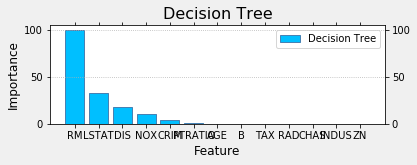

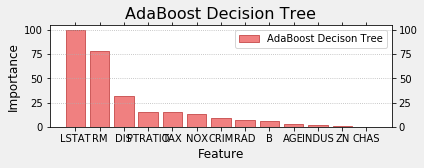

In [22]:
def read_data():
    housing = sd.load_boston()
    #获取列名
    fn = housing.feature_names
    x,y = su.shuffle(housing.data,housing.target,
               random_state=7)
    return fn,x,y

# 对模型的训练
def train_model_dt(x,y):
    # 决策树回归器,参数为最大深度
    model_dt = st.DecisionTreeRegressor(max_depth=4)
    model_dt.fit(x,y)
    return model_dt

def train_model_ab(x,y):
    model_ab = se.AdaBoostRegressor(
        st.DecisionTreeRegressor(max_depth=4),
        n_estimators = 400,random_state=7)
    model_ab.fit(x,y)
    return model_ab

def pred_model(model,x):
    y = model.predict(x)
    return y

# 对模型进行评估
def eval_model(y,pred_y):
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mde = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    #print(mae,mse,mde,evs,r2s)
    
def init_model_dt():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    # 画两张图，上下两张
    mp.subplot(211)
    mp.title('Decision Tree',fontsize=16)
    mp.xlabel('Feature',fontsize=12)
    mp.ylabel('Importance',fontsize=12)
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    # axis='y'只有y轴上带有网格线
    mp.grid(axis='y',linestyle=':')

def draw_model_dt(fn,fi_dt):
    '''
    fn:特征
    fi_dt:存放特征的重要性
    '''
    fi_dt = (fi_dt * 100) / fi_dt.max()
    # 上下逆转，即降序
    sorted_indices = np.flipud(fi_dt.argsort())
    # pos为横坐标
    pos = np.arange(sorted_indices.size)
    mp.bar(pos,fi_dt[sorted_indices],align='center',
          facecolor='deepskyblue',edgecolor='steelblue',
          label='Decision Tree')
    mp.xticks(pos,fn[sorted_indices])
    mp.legend()
    mp.show()

def init_model_ab():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    # 画两张图，上下两张
    mp.subplot(212)
    mp.title('AdaBoost Decision Tree',fontsize=16)
    mp.xlabel('Feature',fontsize=12)
    mp.ylabel('Importance',fontsize=12)
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    # axis='y'只有y轴上带有网格线
    mp.grid(axis='y',linestyle=':')

def draw_model_ab(fn,fi_ab):
    '''
    fn:特征
    fi_dt:存放特征的重要性
    '''
    fi_ab = (fi_ab * 100) / fi_ab.max()
    # 上下逆转，即降序
    sorted_indices = np.flipud(fi_ab.argsort())
    # pos为横坐标
    pos = np.arange(sorted_indices.size)
    mp.bar(pos,fi_ab[sorted_indices],align='center',
          facecolor='lightcoral',edgecolor='indianred',
          label='AdaBoost Decison Tree')
    mp.xticks(pos,fn[sorted_indices])
    mp.legend()
    mp.tight_layout()
    mp.show()

def main():
    fn,x,y = read_data()
    train_size = int(len(x)*0.8)
    train_x = x[:train_size]
    train_y = y[:train_size]
    model_dt = train_model_dt(train_x,train_y)
    model_ab = train_model_ab(train_x,train_y)
    test_x = x[train_size:]
    test_y = y[train_size:]
    pred_test_y_dt = pred_model(model_dt,test_x)
    pred_test_y_ab = pred_model(model_ab,test_x)
    eval_model(test_y,pred_test_y_dt)
    eval_model(test_y,pred_test_y_ab)
    # 模型训练时已经将重要性分出来了，可以直接获取
    fi_dt = model_dt.feature_importances_
    # print(fi_dt)
    fi_ab = model_ab.feature_importances_
    init_model_dt()
    draw_model_dt(fn,fi_dt)
    init_model_ab()
    draw_model_ab(fn,fi_ab)
    return 0

if __name__ == '__main__':
    main()

In [14]:
a = [1,3,8,6,4,2]
b = np.array(a)
print(b)
# flipud使得索引从大到小排序
Indices = np.flipud(b.argsort())
print(Indices)
b[Indices]

[1 3 8 6 4 2]
[2 3 4 1 5 0]


array([8, 6, 4, 3, 2, 1])

### 利用随机森林模型考虑时间周期对特征重要性的影响

In [25]:
import csv

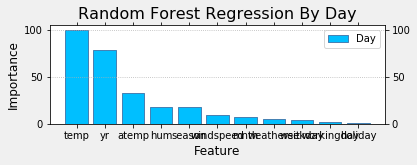

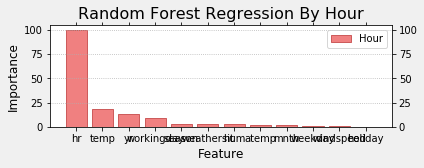

In [29]:
def read_data(filename,fb,fe):
    '''
    数据特征很多时，有时不需要选取所有的列
    fb:起始特征
    fe:终止特征
    '''
    with open(filename,'r') as f:
        # 读取csv文件
        reader = csv.reader(f)
        x,y = [],[]
        for row in reader:
            x.append(row[fb:fe])
            y.append(row[-1])
        fn = np.array(x[0])
        x = np.array(x[1:],dtype=float)
        y = np.array(y[1:],dtype=float)
        x,y = su.shuffle(x,y,random_state=7)
    return fn,x,y
    
def train_model(x,y):
    # 随机森林由若干个决策树组成的，
    # max_depth=10表示每棵树的最大深度
    # min_sample_split最小分裂样本数
    model = se.RandomForestRegressor(max_depth=10,
            n_estimators=1000,min_samples_split=2)
    model.fit(x,y)
    return model

def pred_model(model,x):
    y = model.predict(x)
    return y

# 对模型进行评估
def eval_model(y,pred_y):
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mde = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    #print(mae,mse,mde,evs,r2s)
    
def init_model_day():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    # 画两张图，上下两张
    mp.subplot(211)
    mp.title('Random Forest Regression By Day',fontsize=16)
    mp.xlabel('Feature',fontsize=12)
    mp.ylabel('Importance',fontsize=12)
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    # axis='y'只有y轴上带有网格线
    mp.grid(axis='y',linestyle=':')

def draw_model_day(fn_day,fi_day):
    '''
    fn:特征
    fi_day:存放特征的重要性
    '''
    fi_day = (fi_day * 100) / fi_day.max()
    # 上下逆转，即降序
    sorted_indices = np.flipud(fi_day.argsort())
    # pos为横坐标
    pos = np.arange(sorted_indices.size)
    mp.bar(pos,fi_day[sorted_indices],align='center',
          facecolor='deepskyblue',edgecolor='steelblue',
          label='Day')
    mp.xticks(pos,fn_day[sorted_indices])
    mp.legend()
    mp.show()

def init_model_hour():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    # 画两张图，上下两张
    mp.subplot(212)
    mp.title('Random Forest Regression By Hour',fontsize=16)
    mp.xlabel('Feature',fontsize=12)
    mp.ylabel('Importance',fontsize=12)
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    # axis='y'只有y轴上带有网格线
    mp.grid(axis='y',linestyle=':')

def draw_model_hour(fn_hour,fi_hour):
    '''
    fn_hour:特征
    fi_hour:存放特征的重要性
    '''
    fi_hour = (fi_hour * 100) / fi_hour.max()
    # 上下逆转，即降序
    sorted_indices = np.flipud(fi_hour.argsort())
    # pos为横坐标
    pos = np.arange(sorted_indices.size)
    mp.bar(pos,fi_hour[sorted_indices],align='center',
          facecolor='lightcoral',edgecolor='indianred',
          label='Hour')
    mp.xticks(pos,fn_hour[sorted_indices])
    mp.legend()
    mp.tight_layout()
    mp.show()

def main():
    fn_day,x_day,y_day = read_data('bike_day.csv',2,13)
    train_size_day = int(len(x_day)*0.8)
    train_x_day = x_day[:train_size_day]
    train_y_day = y_day[:train_size_day]
    model_day = train_model(train_x_day,train_y_day)
    # model_ab = train_model_ab(train_x,train_y)
    test_x_day = x_day[train_size_day:]
    test_y_day = y_day[train_size_day:]
    pred_test_y_day = pred_model(model_day,test_x_day)
    # pred_test_y_ab = pred_model(model_ab,test_x)
    eval_model(test_y_day,pred_test_y_day)
    # eval_model(test_y,pred_test_y_ab)
    # 模型训练时已经将重要性分出来了，可以直接获取
    fi_day = model_day.feature_importances_

    fn_hour,x_hour,y_hour = read_data('bike_hour.csv',2,14)
    train_size_hour = int(len(x_hour)*0.8)
    train_x_hour = x_hour[:train_size_hour]
    train_y_hour = y_hour[:train_size_hour]
    model_hour = train_model(train_x_hour,train_y_hour)
    # model_ab = train_model_ab(train_x,train_y)
    test_x_hour = x_hour[train_size_hour:]
    test_y_hour = y_hour[train_size_hour:]
    pred_test_y_hour = pred_model(model_hour,test_x_hour)
    # pred_test_y_ab = pred_model(model_ab,test_x)
    eval_model(test_y_hour,pred_test_y_hour)
    # eval_model(test_y,pred_test_y_ab)
    # 模型训练时已经将重要性分出来了，可以直接获取
    fi_hour = model_hour.feature_importances_
    
    init_model_day()
    draw_model_day(fn_day,fi_day)
    init_model_hour()
    draw_model_hour(fn_hour,fi_hour)
    return 0

if __name__ == '__main__':
    main()